In [10]:
import sys
sys.path.append("..")

from core import coeffs, intersection_points

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
%matplotlib inline

In [75]:
def draw_oblate(b, xo, yo, ro):
    # Set up the figure
    #theta in degrees
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.set_xlim(min(-1.01, xo - ro - 0.01), max(1.01, xo + ro + 0.01));
    ax.set_ylim(min(-1.01, yo - ro - 0.01), max(1.01, yo + ro + 0.01));
    ax.set_aspect(1);
    ax.axis('off');

    # Draw the star
    occulted = Circle((0, 0), 1, fill=False, color='k')
    occulted_fill = Circle((0, 0), 1, fill=True, color='k',alpha=0.03)
    ax.add_artist(occulted)
    ax.add_artist(occulted_fill)
    
    # Draw the planet, multiply semi major and semi minor axes by 2 to get major and minor axes
    occultor = Ellipse((xo, yo), ro*2,ro*b*2, fill=False, color='r')
    occultor_fill = Ellipse((xo, yo), ro*2,ro*b*2, fill=True, color='r',alpha=0.03)
    ax.add_artist(occultor_fill)
    ax.add_artist(occultor)

    ax.plot(0, 0, 'ko')
    ax.plot(xo, yo, 'ro')
    return ax


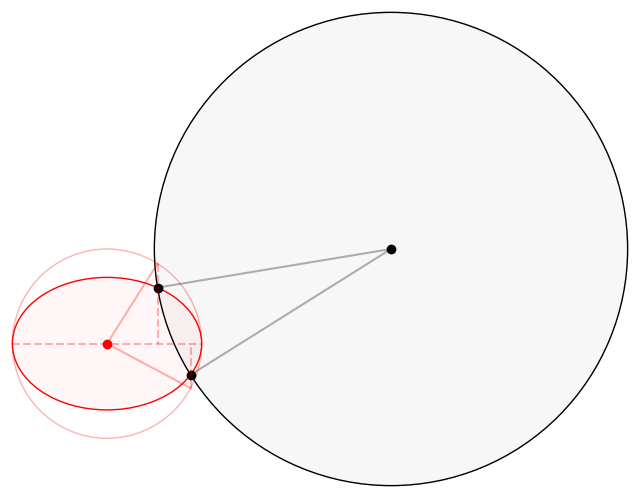

In [76]:
ro = 0.4
b = 1-0.3 # (b=1-f)
xo = -1.2
yo = -0.4 #division by 0 error if 0

x_real, y_real = intersection_points(b, xo, yo, ro)

ax = draw_oblate(b, xo, yo, ro)
ax.plot(x_real,y_real, 'ko')

xi = np.arctan2(y_real,x_real)
ax.plot([0,np.cos(xi[0])],[0,np.sin(xi[0])], 'k-', alpha=0.3)
ax.plot([0,np.cos(xi[1])],[0,np.sin(xi[1])], 'k-', alpha=0.3)

#add the circle bounding the planet to help parametrize the angle phi
anomaly = Circle((xo, yo), ro, fill=False, color='r', alpha=0.3)
ax.add_artist(anomaly)

#horizontal line along the major axis
ax.plot([xo-ro,xo+ro],[yo,yo],'r--',alpha=0.3)

#arctan of y *on the circle circumscribing the occcultor ellipse* to x on the ellipse (drops straight down)
phi = np.arctan2(np.sqrt(ro**2-(x_real-xo)**2),x_real-xo)*np.sign(np.arctan2(y_real-yo,x_real-xo))

#plot the phi angle (parametrized like eccentric anomaly)
ax.plot([xo,xo+ro*np.cos(phi[0])],[yo,yo+ro*np.sin(phi[0])], 'r-', alpha=0.3)
ax.plot([xo,xo+ro*np.cos(phi[1])],[yo,yo+ro*np.sin(phi[1])], 'r-', alpha=0.3)

#plot the line down to the major axis
ax.plot([xo+ro*np.cos(phi[0]), xo+ro*np.cos(phi[0])],[yo+ro*np.sin(phi[0]), yo], 'r--', alpha=0.3)
ax.plot([xo+ro*np.cos(phi[1]), xo+ro*np.cos(phi[1])],[yo+ro*np.sin(phi[1]), yo], 'r--', alpha=0.3)